In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import re

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data['length'] = data['text'].str.len()
data.head()

,id,keyword,location,text,target,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


In [5]:
data_grouped = data.groupby('target')
data_fake = data_grouped.get_group(0)
data_real = data_grouped.get_group(1)

In [6]:
bins=range(0,160,10)

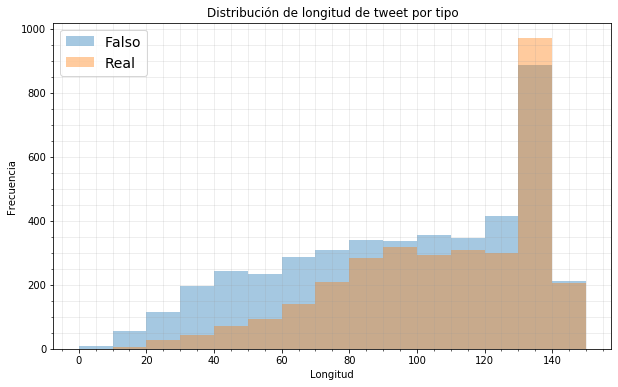

In [7]:
fig = plt.gcf()
fig.set_size_inches(10, 6)

sns.distplot(data_fake['length'],  kde=False, label='Falso', bins=bins)
sns.distplot(data_real['length'],  kde=False,label='Real', bins=bins)

plt.legend(prop={'size': 14})
plt.title('Distribución de longitud de tweet por tipo')
plt.xlabel('Longitud')
plt.ylabel('Frecuencia')

plt.minorticks_on()
plt.grid(which='both', color='#999999', linestyle='-', alpha=0.2)
#plt.show()
plt.savefig('Histogram length by type')

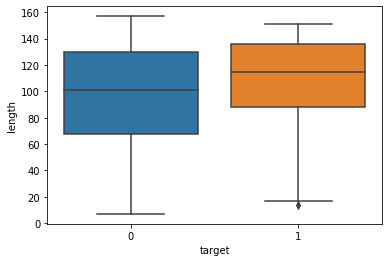

In [8]:
ax = sns.boxplot(x="target", y="length", data=data)

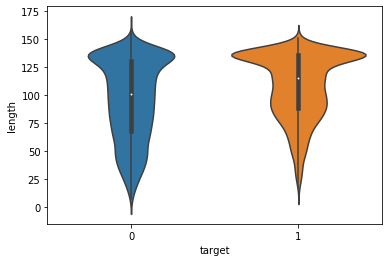

In [9]:
ax = sns.violinplot(x="target", y="length", data=data)

**Keyword**

In [10]:
data['keyword'] = data['keyword'].str.replace('%20', ' ')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
 5   length    7613 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 357.0+ KB


In [12]:
grouped_by_keyword = data.groupby('keyword').agg({'target':'mean','length':'mean'}).reset_index()
grouped_by_keyword.columns=['keyword','target_mean','length_mean']
grouped_by_keyword

,keyword,target_mean,length_mean
0,ablaze,0.361111,94.694444
1,accident,0.685714,100.085714
2,aftershock,0.000000,101.205882
3,airplane accident,0.857143,106.400000
4,ambulance,0.526316,98.394737
...,...,...,...
216,wounded,0.702703,111.054054
217,wounds,0.303030,103.363636
218,wreck,0.189189,88.540541
219,wreckage,1.000000,122.256410


In [13]:
grouped_by_keyword.sort_values(['target_mean'],ascending=False)

,keyword,target_mean,length_mean
62,debris,1.000000,107.594595
219,wreckage,1.000000,122.256410
70,derailment,1.000000,109.794872
153,outbreak,0.975000,128.925000
152,oil spill,0.973684,102.973684
...,...,...,...
27,body bag,0.030303,125.393939
19,blazing,0.029412,96.382353
170,ruin,0.027027,75.459459
29,body bags,0.024390,100.780488


In [14]:
grouped_by_keyword.sort_values(['length_mean'],ascending=False)

,keyword,target_mean,length_mean
166,rescuers,0.914286,129.342857
153,outbreak,0.975000,128.925000
79,devastation,0.750000,125.722222
27,body bag,0.030303,125.393939
92,emergency services,0.333333,125.363636
...,...,...,...
23,blizzard,0.108108,71.891892
180,smoke,0.088235,70.882353
173,screaming,0.055556,70.472222
174,screams,0.142857,70.428571


In [15]:
#Barplot?

**Wordcloud**

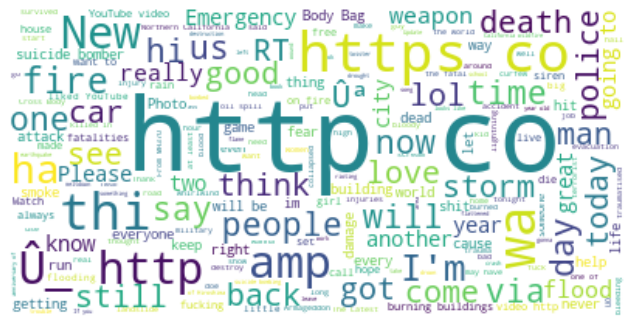

In [16]:
wordcloud = WordCloud(background_color="white").generate(' '.join(data['text']))
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [17]:
#Hay muchas url

In [18]:
data[data['text'].str.contains(pat = 'http')]

,id,keyword,location,text,target,length
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,55
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,67
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,82
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,76
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3...,1,55
...,...,...,...,...,...,...
7606,10866,NaN,NaN,Suicide bomber kills 15 in Saudi security site...,1,121
7607,10867,NaN,NaN,#stormchase Violent Record Breaking EF-5 El Re...,1,134
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65


In [19]:
#data['text_no_url'] = data['text'].str.replace(r'http\S+', '', regex=True)

In [20]:
data['text'].head()

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

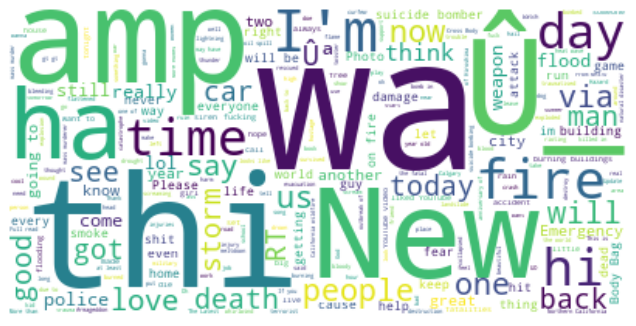

In [21]:
#Wordcloud
wordcloud = WordCloud(background_color="white",max_words = 400).generate(' '.join(data['text'].replace(r'http\S+', ' ', regex=True)))
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()                 

In [22]:
#thi? amp? Û?

In [23]:
#Data real

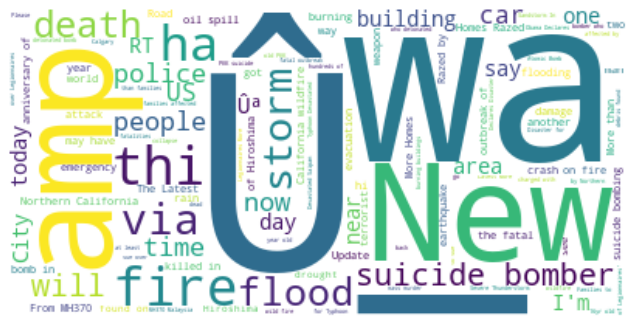

In [24]:
#Wordcloud
wordcloud = WordCloud(background_color="white").generate(' '.join(data_real['text'].replace(r'http\S+', ' ', regex=True)))
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()  

In [25]:
#Data falsa

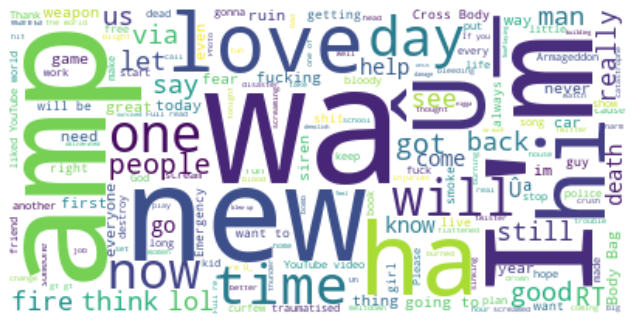

In [26]:
#Wordcloud
wordcloud = WordCloud(background_color="white",max_words = 2500).generate(' '.join(data_fake['text'].replace(r'http\S+', ' ', regex=True)))
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()  

Text(0, 0.5, 'keyword')

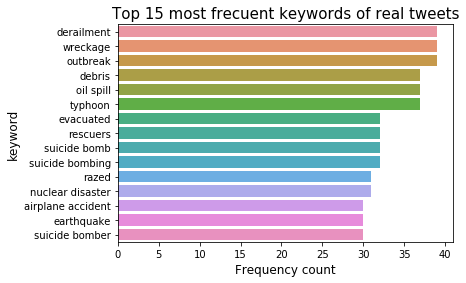

In [27]:
true_tweets = data[data.target == 1]
false_tweets = data[data.target == 0]
keywords_true_count = true_tweets.keyword.value_counts()
keywords_false_count = false_tweets.keyword.value_counts()
g = sns.barplot(x=keywords_true_count[:15,].values, y=keywords_true_count[:15,].index, orient='h')
g.set_title("Top 15 most frecuent keywords of real tweets", fontsize=15)
g.set_xlabel("Frequency count", fontsize=12)
g.set_ylabel("keyword", fontsize=12)

Text(0, 0.5, 'keyword')

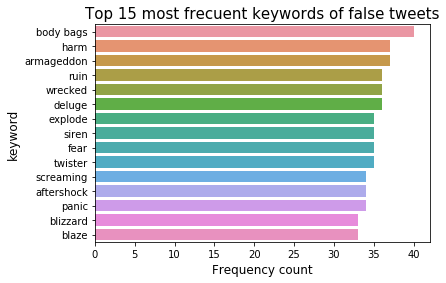

In [28]:
g = sns.barplot(x=keywords_false_count[:15,].values, y=keywords_false_count[:15,].index, orient='h')
g.set_title("Top 15 most frecuent keywords of false tweets", fontsize=15)
g.set_xlabel("Frequency count", fontsize=12)
g.set_ylabel("keyword", fontsize=12)

In [29]:
data[data['text'].str.contains('Û')]['text'].to_list()

['Barbados #Bridgetown JAMAICA \x89ÛÒ Two cars set ablaze: SANTA CRUZ \x89ÛÓ Head of the St Elizabeth Police Superintende...  http://t.co/wDUEaj8Q4J',
 'SANTA CRUZ \x89ÛÓ Head of the St Elizabeth Police Superintendent Lanford Salmon has r ... - http://t.co/vplR5Hka2u http://t.co/SxHW2TNNLf',
 'Set our hearts ablaze and every city was a gift And every skyline was like a kiss upon the lips @\x89Û_ https://t.co/cYoMPZ1A0Z',
 '#stlouis #caraccidentlawyer Speeding Among Top Causes of Teen Accidents https://t.co/k4zoMOF319 https://t.co/S2kXVM0cBA Car Accident tee\x89Û_',
 'RT nAAYf: First accident in years. Turning onto Chandanee Magu from near MMA. Taxi rammed into me while I was halfway turned. Everyone conf\x89Û_',
 '320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/yNXnvVKCDA | @djicemoon | #Dubstep #TrapMusic #DnB #EDM #Dance #Ices\x89Û_ http://t.co/weQPesENku',
 '320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vAM5POdGyw | @djicemoon | #Dubstep #TrapMusic #DnB #EDM #Dance #Ices\x89Û_ http://t.co

In [30]:
#Limpiar texto. Eliminar \x89Û

In [31]:
data.head(20)

,id,keyword,location,text,target,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,110
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,95
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,59
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,79
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,52


In [32]:
data['location'].fillna('no location', inplace = True)
data.head()
undefined_locations = data.groupby('location').get_group('no location')
undefined_locations.head()

,id,keyword,location,text,target,length
0,1,NaN,no location,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,no location,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,no location,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,no location,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,no location,Just got sent this photo from Ruby #Alaska as ...,1,88


In [33]:
undefined_locations_veracity = undefined_locations.groupby('location').agg({'target':['mean']})
#bajo el nivel??
undefined_locations_veracity.head()
#promedio de veracidad de los tweets sin locación:

,target
,mean
location,
no location,0.424398


In [34]:
grouped_location = data.groupby('location')
veracity_per_location = grouped_location['target'].mean()
veracity_per_location.head()

location
                          1.0
  Glasgow                 0.0
  Melbourne, Australia    0.0
  News                    1.0
  å_                      0.0
Name: target, dtype: float64

In [35]:
data['location'].value_counts().sort_values(ascending = False)

no location               2533
USA                        104
New York                    71
United States               50
London                      45
                          ... 
EARTH                        1
SÌ£o Paulo SP,  Brasil       1
#PhanTrash                   1
on the go                    1
Oxford / bristol             1
Name: location, Length: 3342, dtype: int64

In [39]:
data['keyword'].fillna('no keyword', inplace = True)
undefined_keywords = data.groupby('keyword').get_group('no keyword')
undefined_keywords.head()

,id,keyword,location,text,target,length
0,1,no keyword,no location,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,no keyword,no location,Forest fire near La Ronge Sask. Canada,1,38
2,5,no keyword,no location,All residents asked to 'shelter in place' are ...,1,133
3,6,no keyword,no location,"13,000 people receive #wildfires evacuation or...",1,65
4,7,no keyword,no location,Just got sent this photo from Ruby #Alaska as ...,1,88


In [40]:
undefined_keywords_veracity = undefined_keywords.groupby('keyword').agg({'target':['mean']})
#bajo el nivel??
undefined_keywords_veracity.head()
#promedio de veracidad de los tweets sin keywords:

,target
,mean
keyword,
no keyword,0.688525
